In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from bokeh.plotting import figure, output_notebook, show
from bokeh.charts import HeatMap, output_file, show
from bokeh.models import NumeralTickFormatter
from bokeh.sampledata.autompg import autompg
from bokeh.charts import HeatMap, bins, output_file, show
%matplotlib inline
%run '/Users/katya/MSc/ADS/ubird/spectraparser.py'
output_notebook()

Loading BokehJS ...

In [149]:
def extract_unique_mutations(df):
    df.mutations.fillna('', inplace=True)
    unique_mutations = set(':'.join(df.mutations.values).split(':'))
    unique_mutations.remove('')
    return unique_mutations

# Barcodes distribution

In [151]:
aa = pd.DataFrame.from_csv('/Users/katya/MSc/ADS/GFP/amino_acid_genotypes_to_brightness.tsv', sep = '\t', index_col=None)
aa.columns = ['mutations', 'barcodes', 'brightness', 'std']
unique_mutations = extract_unique_mutations(aa)

In [137]:
def fitness_distribution(df):
    hist, edges = np.histogram(df.brightness, density=True, bins=41)
    p = figure(width = 700, height = 500, title = 'Fitness distribution')
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
            fill_color="#FF5656", line_color="#033649", alpha = 0.7)
    p.xaxis.axis_label = 'Fitness'
    show(p)

In [138]:
fitness_distribution(aa)

# Mutations distribution in the protein sequence

In [153]:
def mutations_distribution(df, unique_mutations):
    positions = [int(m[2:-1]) for m in unique_mutations if m != '']
    hist, edges = np.histogram(positions, density=False, bins=max(positions))
    p = figure(width = 1000, height = 300, title = 'Mutations distribution')
    p.quad(top = hist, bottom=0, left=edges[:-1], right=edges[1:],
            fill_color="#1C7293", line_color="#033649", alpha = 0.5)
    p.xaxis.axis_label = 'Position number'
    p.yaxis.axis_label = 'Number of mutations'
    show(p)

In [154]:
mutations_distribution(aa, unique_mutations)

# Aminoacid switches

In [156]:
unique_mutations

{'SK50N',
 'SK50L',
 'SK50M',
 'SK50G',
 'SK50D',
 'SK50E',
 'SK50A',
 'SK50V',
 'SD80V',
 'SK50T',
 'SK50R',
 'SK50S',
 'SK50Q',
 'SK43R',
 'SK43Q',
 'SK43V',
 'SK43W',
 'SK43T',
 'SK43N',
 'SK43M',
 'SK43G',
 'SK43E',
 'SP56S',
 'SP56R',
 'SP56T',
 'SP56A',
 'SP56H',
 'SP56L',
 'SD101V',
 'SS26*',
 'SD80H',
 'ST60N',
 'ST60I',
 'ST60A',
 'SN119*',
 'SG132C',
 'ST60P',
 'ST60S',
 'SN119Y',
 'SN119T',
 'SG18D',
 'SG18C',
 'SN119R',
 'SN119S',
 'SN119L',
 'SN119H',
 'SN119I',
 'SN119K',
 'SN119D',
 'SN119E',
 'SN119G',
 'SG18R',
 'SG18S',
 'SN119C',
 'SL199M',
 'SL199H',
 'SL199V',
 'SL199R',
 'SL199P',
 'SL199Q',
 'SL62V',
 'SL62T',
 'SL62R',
 'SL62P',
 'SL62Q',
 'SL62M',
 'SF128I',
 'SF128L',
 'SF128C',
 'SF128Y',
 'SF128P',
 'SF128R',
 'SF128S',
 'SF128T',
 'SF128V',
 'SA204D',
 'SA204G',
 'SA204T',
 'SA204V',
 'SA204P',
 'SA204S',
 'SM86K',
 'SM86I',
 'SM86L',
 'SM86A',
 'SM86E',
 'SM86S',
 'SM86R',
 'SM86Q',
 'SM86V',
 'SM86T',
 'SE3*',
 'SE3Q',
 'SE3R',
 'SE3V',
 'SE3A',
 'SE3D',


In [161]:
def switch_analysis(df, unique_mutations):
    aa = list("ACDEFGHIKLMNPQRSTVWYX*")
    aa2aa = pd.DataFrame(columns = aa, index = aa).fillna(0)
    for m in unique_mutations:
        aa2aa[m[-1]].ix[m[1]] += 1
    plt.figure(figsize = [10, 8])
    sns.heatmap(aa2aa, cmap='Blues')
    plt.xlabel('To', fontsize = 10)
    plt.ylabel('From', fontsize = 10);

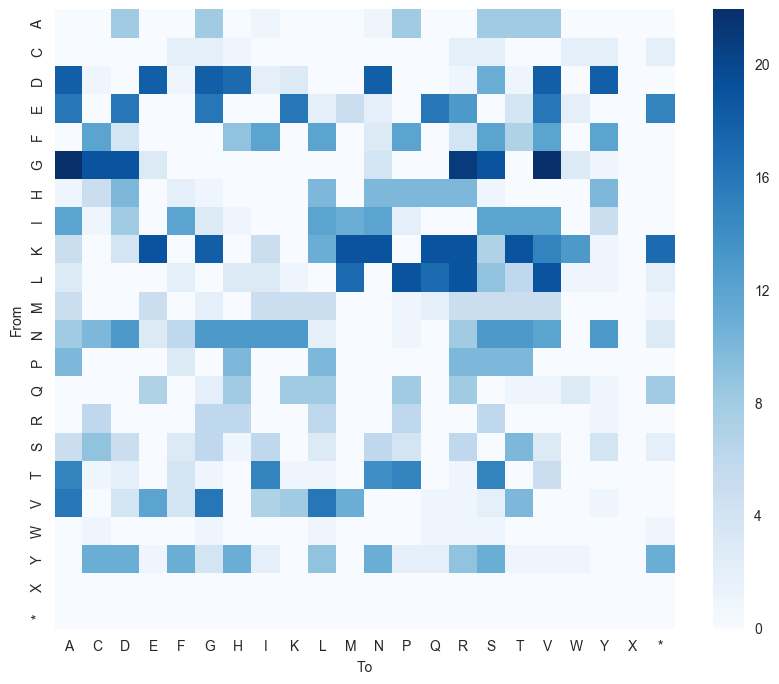

In [162]:
switch_analysis(aa, unique_mutations)

# Number of unique mutations in different types of mutants

1115
1393


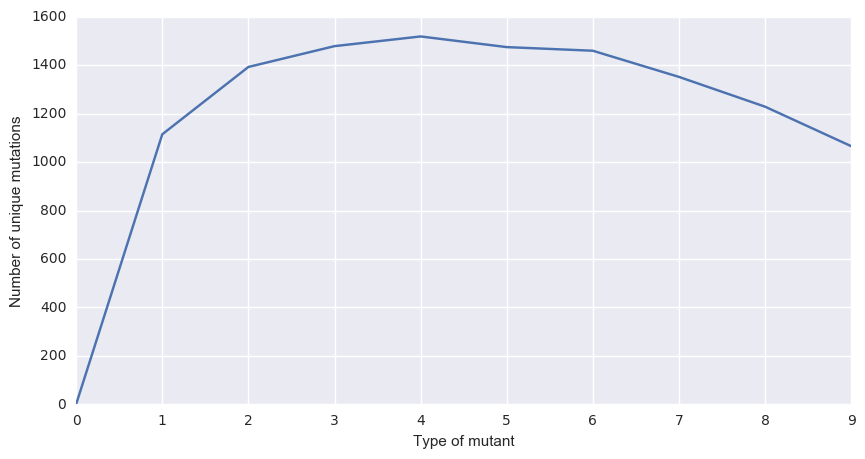

In [16]:
by_aa = pd.read_table('/Users/katya/MSc/ADS/GFP/amino_acid_genotypes_to_brightness.tsv')
by_aa.aaMutations.fillna('', inplace=True)
by_aa['mut_number'] = by_aa.aaMutations.apply(lambda x: x.count(':') + 1)
singles = by_aa[by_aa.mut_number == 1]
doubles = by_aa[by_aa.mut_number == 2]
unique_mutations_in_doubles = set(':'.join(doubles.aaMutations.values).split(':'))
print len(singles)
print len(unique_mutations_in_doubles)

uniques = []
for i in range(10):
    subset = by_aa[by_aa.mut_number == i]
    uniques.append(len(set(':'.join(subset.aaMutations.values).split(':'))))

plot_better()
plt.plot(range(10), uniques)
plt.xlabel('Type of mutant')
plt.ylabel('Number of unique mutations');

# Brightness distribution among singles/double/triplets, etc

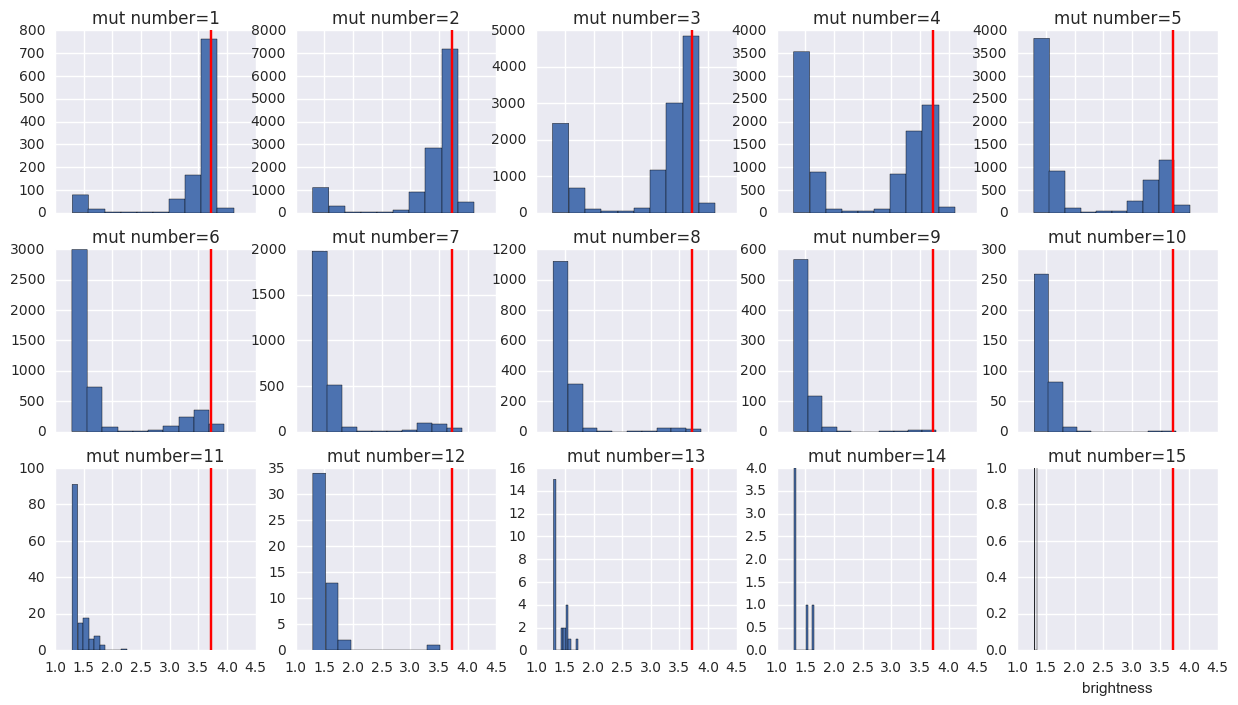

In [23]:
bright_arr = by_aa['medianBrightness'].drop(0).values
mutants = by_aa['aaMutations']       #split to list of aminoacids
mutants = mutants.str.split(':')
mut_len = np.zeros(len(mutants))  #start from index 1 to drop the first NaN
for i in xrange(1,mutants.shape[0]):
    mut_len[i]=len(mutants[i])
mut_len = mut_len[1:]

fig, axs = plt.subplots(3,5, figsize=(15, 8), sharex=True)
fig.subplots_adjust(hspace = .2, wspace=.2)

axs = axs.ravel()

for i in xrange(15):

    axs[i].hist(bright_arr[np.where(mut_len==i+1)])
    axs[i].grid(True)
    axs[i].set_title('mut number='+str(i+1))
    axs[i].axvline(x = 3.72, ymin = 0, ymax = 1, color = 'r') # wild value
    
plt.xlabel('brightness')
plt.show()